# Airline On-Time Performance Data Exploration
## by (Bui Tuan Anh)

## Introduction
> Introduce the dataset

> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from Jan 2007 to December 2007.
  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display
from datetime import datetime
from datetime import date
plt.style.use('seaborn')

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# read file in bz2 to pandas dataframe
df_flights = pd.read_csv('2007.csv.bz2', compression="bz2")
# set display full column
pd.options.display.max_columns = None

In [3]:
df_flights.head(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3,9,0,NaN,0,0,0,0,0,0
5,2007,1,1,1,1430.0,1420,1553.0,1550,WN,2386,N611SW,83.0,90.0,74.0,3.0,10.0,SMF,PDX,479,2,7,0,NaN,0,0,0,0,0,0
6,2007,1,1,1,1936.0,1840,2217.0,2130,WN,409,N482,101.0,110.0,89.0,47.0,56.0,SMF,PHX,647,5,7,0,NaN,0,46,0,0,0,1
7,2007,1,1,1,944.0,935,1223.0,1225,WN,1131,N749SW,99.0,110.0,86.0,-2.0,9.0,SMF,PHX,647,4,9,0,NaN,0,0,0,0,0,0
8,2007,1,1,1,1537.0,1450,1819.0,1735,WN,1212,N451,102.0,105.0,90.0,44.0,47.0,SMF,PHX,647,5,7,0,NaN,0,20,0,0,0,24
9,2007,1,1,1,1318.0,1315,1603.0,1610,WN,2456,N630WN,105.0,115.0,92.0,-7.0,3.0,SMF,PHX,647,5,8,0,NaN,0,0,0,0,0,0


In [4]:
# see the duration of this dataset
print(df_flights['Month'] .iloc[[0, -1]])
print(df_flights['DayofMonth'] .iloc[[0, -1]])
print(df_flights['Year'] .iloc[[0, -1]])

0           1
7453214    12
Name: Month, dtype: int64
0           1
7453214    15
Name: DayofMonth, dtype: int64
0          2007
7453214    2007
Name: Year, dtype: int64


In [5]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(7), int64(17), object(5)
memory usage: 1.6+ GB


>`DepTime`
`CRSDepTime`
`ArrTime`
`CRSArrTime`
Should in dateTime type instead of float and int.

In [6]:
df_flights['DepTime'].max()

2400.0

In [7]:
df_flights['DepTime'].min()

1.0

In [8]:
# convert float 1.0 -> 2400.0 to datetime
def change_time_type (col):
    df_flights[col]= (pd.to_timedelta(df_flights[col] // 100, unit='h') +\
                   pd.to_timedelta(df_flights[col] % 100, unit='m'))
change_time_type('DepTime')
change_time_type('CRSDepTime')
change_time_type('ArrTime')
change_time_type('CRSArrTime')

In [9]:
# Check
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,12:32:00,12:25:00,13:41:00,13:40:00,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,19:18:00,19:05:00,20:43:00,20:35:00,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,22:06:00,21:30:00,23:34:00,23:00:00,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,12:30:00,12:00:00,13:56:00,13:30:00,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,08:31:00,08:30:00,09:57:00,10:00:00,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3,9,0,NaN,0,0,0,0,0,0


In [10]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7453215.0,7.453215e+06,7.453215e+06,7.453215e+06,7292467,7453215,7275288,7453215,7.453215e+06,7.275288e+06,7.452221e+06,7.275288e+06,7.275288e+06,7.292467e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06
mean,2007.0,6.514876e+00,1.572589e+01,3.933804e+00,0 days 13:35:25.853818,0 days 13:28:58.685665,0 days 15:01:01.673665,0 days 15:08:48.071147,2.188099e+03,1.263223e+02,1.272502e+02,1.028159e+02,1.019218e+01,1.139914e+01,7.198058e+02,6.691984e+00,1.630015e+01,2.156761e-02,2.304911e-03,3.865236e+00,7.700904e-01,3.783702e+00,2.373553e-02,5.099134e+00
std,0.0,3.425117e+00,8.781154e+00,1.992267e+00,0 days 04:47:50.034853,0 days 04:39:32.260094,0 days 05:04:28.187144,0 days 04:49:08.841272,1.971958e+03,7.118009e+01,7.035750e+01,6.824577e+01,3.930774e+01,3.614189e+01,5.623051e+02,5.151351e+00,1.183396e+01,1.452668e-01,4.795413e-02,2.084240e+01,9.619547e+00,1.617670e+01,1.084995e+00,2.127753e+01
min,2007.0,1.000000e+00,1.000000e+00,1.000000e+00,0 days 00:01:00,0 days 00:00:00,0 days 00:01:00,0 days 00:00:00,1.000000e+00,1.200000e+01,-1.240000e+03,0.000000e+00,-3.120000e+02,-3.050000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007.0,4.000000e+00,8.000000e+00,2.000000e+00,0 days 09:30:00,0 days 09:30:00,0 days 11:07:00,0 days 11:15:00,5.900000e+02,7.600000e+01,7.700000e+01,5.500000e+01,-9.000000e+00,-4.000000e+00,3.190000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.0,7.000000e+00,1.600000e+01,4.000000e+00,0 days 13:29:00,0 days 13:22:00,0 days 15:13:00,0 days 15:20:00,1.509000e+03,1.080000e+02,1.100000e+02,8.400000e+01,0.000000e+00,0.000000e+00,5.690000e+02,5.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2007.0,9.000000e+00,2.300000e+01,6.000000e+00,0 days 17:33:00,0 days 17:20:00,0 days 19:11:00,0 days 19:06:00,3.553000e+03,1.560000e+02,1.560000e+02,1.310000e+02,1.400000e+01,1.100000e+01,9.460000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2007.0,1.200000e+01,3.100000e+01,7.000000e+00,1 days 00:00:00,0 days 23:59:00,1 days 00:00:00,1 days 00:00:00,9.602000e+03,1.270000e+03,1.430000e+03,1.257000e+03,2.598000e+03,2.601000e+03,4.962000e+03,5.450000e+02,5.300000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.386000e+03,3.820000e+02,1.031000e+03


In [11]:
df_flights.Month.value_counts()

8     653279
7     648560
3     639209
5     631609
10    629992
6     629280
1     621559
4     614648
12    614139
11    605149
9     600187
2     565604
Name: Month, dtype: int64

In [12]:
df_flights.TailNum.value_counts()

0         105239
000000     11635
N655BR      4483
N479HA      4359
N651BR      4346
N478HA      4316
N654BR      4278
N480HA      4225
N485HA      4203
N693BR      4132
N484HA      4126
N481HA      4045
N487HA      4038
N477HA      3958
N810AL      3940
N837AL      3883
N475HA      3854
N486HA      3820
N476HA      3685
N808AL      3685
N836AL      3680
N824AL      3676
N646BR      3535
N828AL      3499
N295SW      3466
N226SW      3462
N835AL      3447
N292SW      3437
N220SW      3435
N295UX      3426
           ...  
N178UA         4
N851NW         4
N118UA         4
N721TW         4
N104UA         4
N69020         3
N298           3
N187UA         3
N181UA         3
N611QX         2
N601QX         2
N76010         2
N78005         2
N77012         2
N78013         2
HZO            2
N624US         2
N197UA         2
N78008         2
N78001         2
N297           2
N331AW         2
N852NW         2
N623US         1
N78017         1
N78009         1
N857NW         1
N576SK        

In [13]:
df_flights.UniqueCarrier.value_counts()

WN    1168871
AA     633857
OO     597882
MQ     540494
UA     490002
US     485447
DL     475889
XE     434773
NW     414526
CO     323151
YV     294362
EV     286234
FL     263159
9E     258851
OH     233787
B6     191450
AS     160185
F9      97760
HA      56175
AQ      46360
Name: UniqueCarrier, dtype: int64

In [15]:
df_flights['AirTime'].isna().sum()

177927

In [16]:
#replace NaN AirTime to 0, because some flight cancelled mean no time in air
df_flights['AirTime'].fillna(0, inplace = True)

In [17]:
df_flights.Cancelled.value_counts()

0    7292467
1     160748
Name: Cancelled, dtype: int64

In [18]:
df_flights.CancellationCode.value_counts()

A    66779
B    61936
C    31995
D       39
Name: CancellationCode, dtype: int64

In [19]:
df_flights.Diverted.value_counts()

0    7436036
1      17179
Name: Diverted, dtype: int64

In [20]:
df_airports = pd.read_csv('airports.csv')
df_airports.sample(5)

,iata,airport,city,state,country,lat,long
2738,Q84,Mendota,Mendota,CA,USA,36.758005,-120.371279
2682,PTB,Dinwiddie County,Petersburg,VA,USA,37.183758,-77.507389
1176,CQB,Chandler Municipal,Chandler,OK,USA,35.723816,-96.820273
2171,M54,Lebanon Municipal,Lebanon,TN,USA,36.190417,-86.315694
1117,CIC,Chico Municipal,Chico,CA,USA,39.795383,-121.858423


In [21]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
iata       3376 non-null object
airport    3376 non-null object
city       3364 non-null object
state      3364 non-null object
country    3376 non-null object
lat        3376 non-null float64
long       3376 non-null float64
dtypes: float64(2), object(5)
memory usage: 184.7+ KB


>There are 12 null value in city and state. but i don't use this table so let it here

In [22]:
df_carriers = pd.read_csv('carriers.csv')
df_carriers['Description'].sample(20)

1483             Hispaniola Airways
715                  Arrow Air Inc.
907         Northward Airlines Ltd.
1174               Shawnee Airlines
987            Petro Aviation Corp.
1181    South Pacific Island Airway
206             Aloha Airlines Inc.
639           Holiday Airlines Inc.
635              Time Air Sweden Ab
1179                Sky One Express
480               Eagle Jet Charter
965                    Pro Air Inc.
319                   Spantax S. A.
284                  Beyer Aviation
1241       Terre Haute Air Commuter
1453        Express Air/dba Sunrise
1341         Viacao Aerea Sao Paulo
497            Astar Air Cargo Inc.
1363          Westward Airways Inc.
142              Air Excursions LLC
Name: Description, dtype: object

In [23]:
df_carriers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 2 columns):
Code           1490 non-null object
Description    1491 non-null object
dtypes: object(2)
memory usage: 23.4+ KB


> Code is the primary key so in here we just drop the null value

In [24]:
df_carriers.dropna(inplace=True)
df_carriers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 1490
Data columns (total 2 columns):
Code           1490 non-null object
Description    1490 non-null object
dtypes: object(2)
memory usage: 34.9+ KB


In [25]:
df_plane_data = pd.read_csv('plane-data.csv')

In [26]:
df_plane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
tailnum          5029 non-null object
type             4480 non-null object
manufacturer     4480 non-null object
issue_date       4480 non-null object
model            4480 non-null object
status           4480 non-null object
aircraft_type    4480 non-null object
engine_type      4480 non-null object
year             4480 non-null object
dtypes: object(9)
memory usage: 353.7+ KB


In [27]:
pd.options.display.max_seq_items = None
print(df_plane_data['issue_date'].value_counts().index)

Index(['12/22/1986', '05/13/2004', '05/15/1998', '10/20/2000', '05/30/2002',
       '09/28/2005', '09/27/2005', '10/31/2000', '05/19/2004', '03/22/2004',
       '08/02/1994', '06/17/1999', '05/26/2004', '10/09/2003', '02/26/2004',
       '07/27/2007', '04/14/2004', '07/22/1998', '09/30/2005', '10/30/2000',
       '06/24/2003', '12/20/2007', '05/20/2004', '06/25/2003', '06/26/2003',
       '06/20/2007', '12/28/1999', '04/17/2007', '01/04/1999', '07/28/2006',
       '02/14/2005', '12/18/1998', '03/12/2004', '12/31/1990', '10/17/2005',
       '03/22/2001', '05/31/2002', '09/29/2005', '07/19/2007', '02/23/1998',
       '04/01/2004', '05/16/2001', '11/29/2007', '09/09/2005', '02/22/2001',
       '04/30/2004', '01/31/2003', '11/01/2000', '02/28/2006', '02/24/2006',
       '11/29/1997', '06/19/1998', '09/06/2002', '08/25/1999', '04/12/2005',
       '04/09/2004', '05/17/2004', '06/22/2005', '01/25/2002', '11/15/2001',
       '08/31/2000', '08/23/2007', '12/07/2004', '09/12/2005', '04/08/2004',

In [28]:
df_plane_data.sample(10)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
1144,N33209,Corporation,BOEING,09/01/2000,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2000
4982,N983AT,Corporation,BOEING,12/07/2005,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,None
3002,N642CA,Corporation,BOMBARDIER INC,12/08/2003,CL-600-2C10,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2003
517,N177UA,Corporation,BOEING,03/01/2006,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990
348,N156AW,Corporation,BOEING,08/25/1999,737-3G7,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1987
1701,N416UA,Corporation,AIRBUS INDUSTRIE,05/26/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1994
949,N29515,Corporation,EMBRAER,10/31/2000,EMB-135LR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2000
4989,N985AT,Corporation,BOEING,06/29/2001,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2001
1303,N361AA,Corporation,BOEING,07/09/1996,767-323,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988
2243,N517AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_plane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
tailnum          5029 non-null object
type             4480 non-null object
manufacturer     4480 non-null object
issue_date       4480 non-null object
model            4480 non-null object
status           4480 non-null object
aircraft_type    4480 non-null object
engine_type      4480 non-null object
year             4480 non-null object
dtypes: object(9)
memory usage: 353.7+ KB


In [30]:
df_plane_data.manufacturer.value_counts()

BOEING                            2061
EMBRAER                            588
BOMBARDIER INC                     547
AIRBUS INDUSTRIE                   434
MCDONNELL DOUGLAS                  253
AIRBUS                             244
MCDONNELL DOUGLAS AIRCRAFT CO      105
CANADAIR                            86
DOUGLAS                             36
SAAB-SCANIA                         28
DEHAVILLAND                         17
MCDONNELL DOUGLAS CORPORATION       14
CESSNA                              12
AEROSPATIALE                         8
AEROSPATIALE/ALENIA                  6
PIPER                                6
BEECH                                5
SIKORSKY                             3
RAVEN                                3
GULFSTREAM AEROSPACE                 2
MAULE                                2
AERO COMMANDER                       2
AVIAT AIRCRAFT INC                   2
BOEING OF CANADA LTD                 1
DIAMOND AIRCRAFT IND INC             1
FRIEDEMANN JON           

>There are so many null value in this table. But I'm not using it so we don't clean it.

In [31]:
df_variable_descriptions = pd.read_csv('variable-descriptions.csv')
df_variable_descriptions.head(40)

,Variable descriptions,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Name,Description
2,1.0,Year,1987-2008
3,2.0,Month,12-Jan
4,3.0,DayofMonth,31-Jan
5,4.0,DayOfWeek,1 (Monday) - 7 (Sunday)
6,5.0,DepTime,"actual departure time (local, hhmm)"
7,6.0,CRSDepTime,"scheduled departure time (local, hhmm)"
8,7.0,ArrTime,"actual arrival time (local, hhmm)"
9,8.0,CRSArrTime,"scheduled arrival time (local, hhmm)"


In [32]:
pd.set_option('display.max_colwidth', 500)

In [33]:
df_variable_descriptions[df_variable_descriptions['Unnamed: 1'] == 'CancellationCode']

,Variable descriptions,Unnamed: 1,Unnamed: 2
24,23.0,CancellationCode,"reason for cancellation (A = carrier, B = weather, C = NAS, D = security)"


In [34]:
df_variable_descriptions.shape

(31, 3)

### What is the structure of your dataset?

> There are 5 table, **df_flights** contain records about flights, **df_airports** contain records about airports, **df_carriers** contain records about carriers,  **df_plane_data contain** records about plane, **df_variable_descriptions** contain records about variable descriptions in the **df_flights**.

> The dataset has **7,453,215 flights** details with **29 features** all has descriptions in df_variable_descriptions. The data ranges from **Jan 1, 2007** to **December 15, 2007**.

> The variables in the df_flights contains information about flights like **date** (Year, Month, DayofMonth, DayOfWeek), **time in schedules** (CRSDepTime, CRSArrTime), **actual time** (DepTime, ArrTime), **duration** (CRSElapsedTime, ActualElapsedTime, AirTime), **origin**, **destination**, **cancellation status** (and cause of cancellation), **delay** (and cause of delay), etc.

### What is/are the main feature(s) of interest in your dataset?


> How cancelled and delayed flights are distributed.

> Is any correlation between day in a week and the status of cancelled flights.

> What causes flights to be cancelled or delayed.

> Which day in the week has the highest proportion of cancelled flights.

> what is the carrier with the highest proportion of cancelled flights, etc.

> what is correlation between distance and airTime.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The DayOfWeek, CRSDepTime, ArrDelay, DepDelay, CRSArrTime, UniqueCarrier, Cancelled, CancellationCode, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay.

## Univariate Exploration


Distribution of flights in day of week

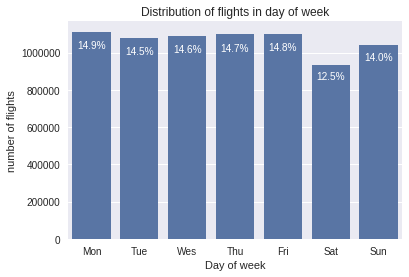

In [35]:
DayOfWeek_label = ['Mon', 'Tue', 'Wes', 'Thu', 'Fri', 'Sat', 'Sun']

base_color = sb.color_palette()[0]
sb.countplot(data = df_flights, x='DayOfWeek', color = base_color)

#get x location and label
locs, labels = plt.xticks()

#get all the flight
all_flight_count = df_flights.shape[0]
df_counts = df_flights['DayOfWeek'].value_counts()

for loc, label in zip(locs, labels):
    # get y position
    count = df_counts[int(label.get_text())]
    # get annotaion
    annotaion_string = f'{100*count/all_flight_count:0.1f}%'
    plt.text(loc ,0.92*count, annotaion_string, ha = 'center', color = 'w')
    
#Change x ticks label to mon, tue,,,
plt.xticks(locs, DayOfWeek_label)

# label, title
plt.xlabel('Day of week')
plt.ylabel('number of flights')
plt.title('Distribution of flights in day of week');

Seem nothing unusual. Saturday a little less than others.

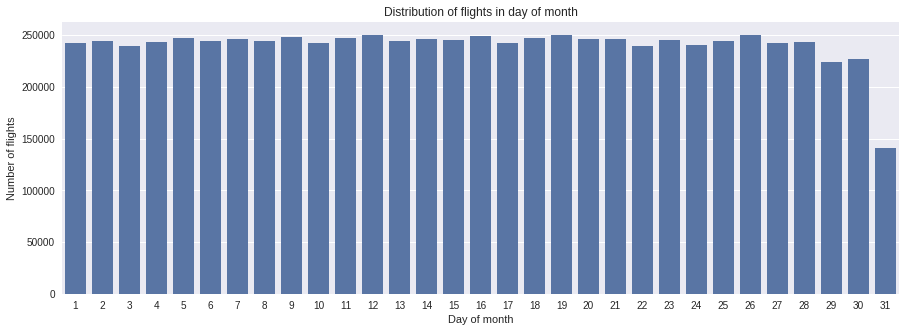

In [36]:
#plot
plt.figure(figsize=[15,5])
sb.countplot(data = df_flights, x='DayofMonth', color = base_color)

#label, title
plt.xlabel('Day of month')
plt.ylabel('Number of flights')
plt.title('Distribution of flights in day of month');

Seem nothing unusual because not all month have 31st

Text(0.5,1,'Distribution of flights in month of year')

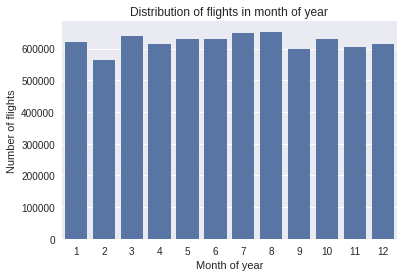

In [37]:
#plot
sb.countplot(data = df_flights, x='Month', color = base_color)

#label, title
plt.xlabel('Month of year')
plt.ylabel('Number of flights')
plt.title('Distribution of flights in month of year')

Nothing unusual

In [38]:
#get label of all carrier
label_carrier = []
carrier_order = df_flights['UniqueCarrier'].value_counts().index
for carrier in carrier_order:
    label_carrier.append(df_carriers[df_carriers['Code']==carrier].values[0][1].split('.')[0])

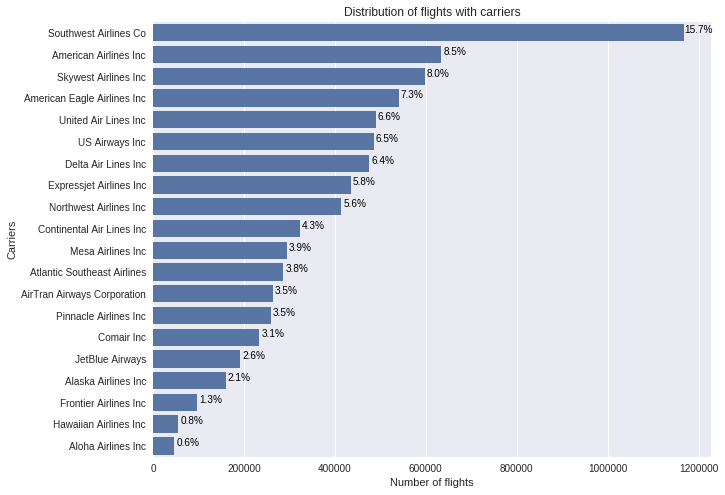

In [39]:
df_count = df_flights['UniqueCarrier'].value_counts()

#plot
plt.figure(figsize=[10,8])
sb.countplot(data=df_flights, y = 'UniqueCarrier', color = base_color, order = carrier_order);

#ticks, y tick label
locs, labels = plt.yticks();

# add annotation
for loc, label in zip(locs, labels):
    # get y position
    count = df_count[label.get_text()]
    annotaion_string = f'{100*count/all_flight_count:0.1f}%'
    # print the annotation just aside the bar
    plt.text(count + 30000, loc , annotaion_string, ha = 'center', color = 'black')

# change y tick label
plt.yticks(locs, label_carrier);

#label, title
plt.xlabel('Number of flights')
plt.ylabel('Carriers')
plt.title('Distribution of flights with carriers');

Sounthwest Airlines has the highest flights (15.7%) followed by American Airlines (8.5%).

In [40]:
df_flights['AirTime'].describe()

count    7.453215e+06
mean     1.003615e+02
std      6.922885e+01
min      0.000000e+00
25%      5.300000e+01
50%      8.300000e+01
75%      1.290000e+02
max      1.257000e+03
Name: AirTime, dtype: float64

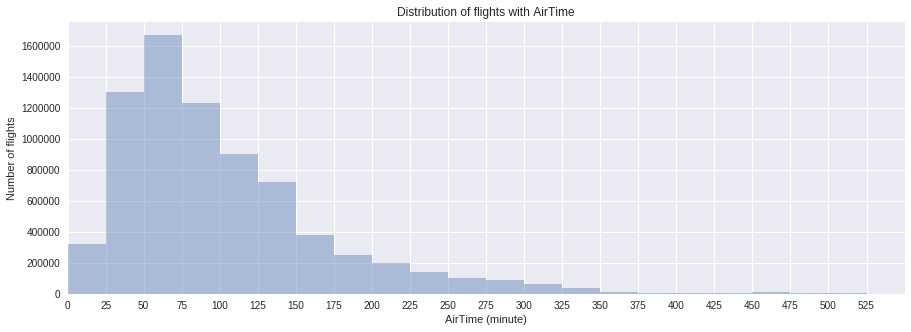

In [41]:
bins_AirTime = np.arange(0,550, 25)
ticks_AirTime = np.arange(0,550,25)

#plot
plt.figure(figsize=[15,5])
sb.distplot(df_flights['AirTime'].dropna(), bins=bins_AirTime, kde=False)

#bin, tick label, x limit

labels_AirTime = ['{}'.format(v) for v in ticks_AirTime]
plt.xlim(0,550)

#label, title
plt.xticks(ticks_AirTime, labels_AirTime);
plt.ylabel('Number of flights')
plt.xlabel('AirTime (minute)')
plt.title('Distribution of flights with AirTime');

More than 50% of flights have air time between 50 and 150 minute

In [42]:
df_flights['ArrDelay'].describe()

count    7.275288e+06
mean     1.019218e+01
std      3.930774e+01
min     -3.120000e+02
25%     -9.000000e+00
50%      0.000000e+00
75%      1.400000e+01
max      2.598000e+03
Name: ArrDelay, dtype: float64

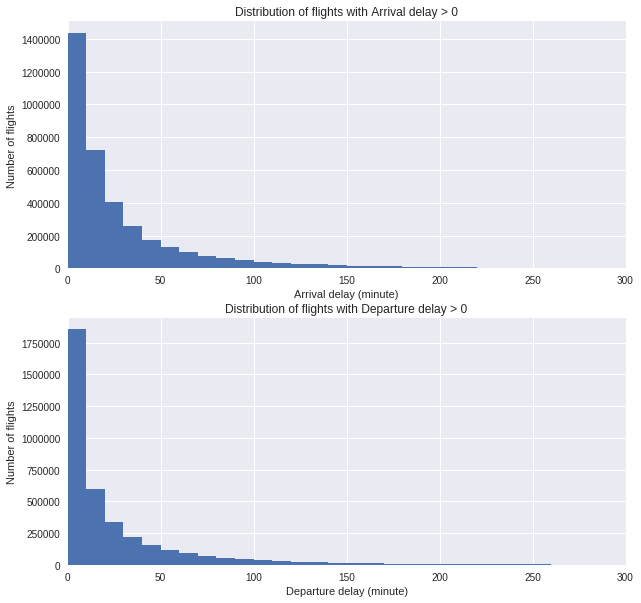

In [43]:
bins_arr = np.arange(0,df_flights['ArrDelay'].max()+10, 10)
bins_dep = np.arange(0,df_flights['DepDelay'].max()+10, 10)
plt.figure(figsize = [10,10])

#plot1
plt.subplot(2,1,1)
df_flights['ArrDelay'].hist(bins = bins_arr)
plt.xlim(0,300)

#label, title
plt.ylabel('Number of flights')
plt.xlabel('Arrival delay (minute)')
plt.title('Distribution of flights with Arrival delay > 0');

#plot2
plt.subplot(2,1,2)
df_flights['DepDelay'].hist(bins = bins_dep)
plt.xlim(0,300)

#label, title
plt.ylabel('Number of flights')
plt.xlabel('Departure delay (minute)')
plt.title('Distribution of flights with Departure delay > 0');

In [44]:
#get label of all airports
def get_airports_label(type):
    label_airports = []
    airports_order = df_flights[type].value_counts().iloc[:10].index
    for airport in airports_order:
        label_airports.append(df_airports[df_airports['iata']==airport].values[0][1])
    return label_airports

label_airports_origin = get_airports_label('Origin')
label_airports_des = get_airports_label('Dest')

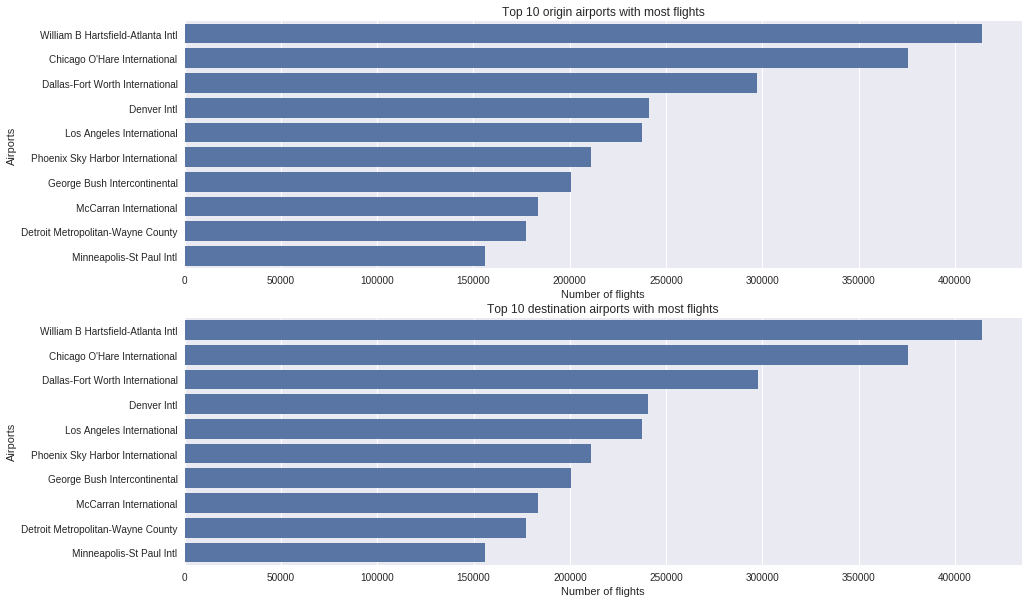

In [45]:
plt.figure(figsize=[15,10])
top_10_origin = df_flights['Origin'].value_counts().iloc[:10]
top_10_dest = df_flights['Dest'].value_counts().iloc[:10]

plt.subplot(2,1,1)
sb.barplot(y = top_10_origin.index, x= top_10_origin.values, color = base_color)

#ticks, y tick label
loc, lable = plt.yticks();
plt.yticks(loc, label_airports_origin);

#label, title
plt.ylabel('Airports')
plt.xlabel('Number of flights')
plt.title('Top 10 origin airports with most flights');

plt.subplot(2,1,2)
sb.barplot(y = top_10_dest.index, x = top_10_dest.values, color = base_color)

#ticks, y tick label
loc, lable = plt.yticks();
plt.yticks(loc, label_airports_des);

#label, title
plt.ylabel('Airports')
plt.xlabel('Number of flights')
plt.title('Top 10 destination airports with most flights');

- Same with origin and destination, this is 10 airport that have most flights
- William B Hartsfield-Atlanta Intl is the airport have the most flights

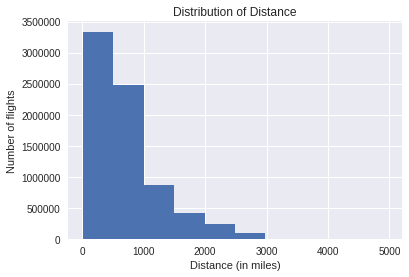

In [46]:
df_flights['Distance'].hist();

#label, title
plt.ylabel('Number of flights')
plt.xlabel('Distance (in miles)')
plt.title('Distribution of Distance');

Distance distribution is between 0 and 3000 miles

In [47]:
cancel_data = df_flights['Cancelled'].value_counts()

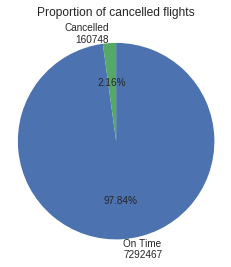

In [64]:
#plot
labels = f'On Time\n{cancel_data.values[0]}', f'Cancelled\n{cancel_data.values[1]}'
plt.pie(cancel_data, labels = labels, startangle=90, counterclock=False, autopct='%.2f%%')
plt.axis('square');

#label, title
ax = plt.gca()
ax.title.set_position([.5, 1.05])
plt.title('Proportion of cancelled flights');

2,16% of all the flight has been cancelled

In [49]:
df_flights['CancellationCode'].value_counts()

A    66779
B    61936
C    31995
D       39
Name: CancellationCode, dtype: int64

In [50]:
cancel_count = df_flights['CancellationCode'].count()

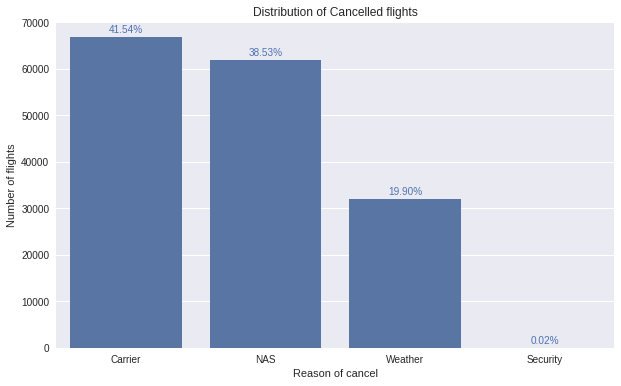

In [51]:
df_count = df_flights['CancellationCode'].value_counts()

#plot
plt.figure(figsize=(10, 6))
sb.countplot(data=df_flights, x='CancellationCode', color=base_color)
cancel_label = ['Carrier', 'NAS', 'Weather', 'Security']
locs, labels = plt.xticks()

#add annotation
for loc, label in zip(locs, labels):
    # get y position
    count = df_count[label.get_text()]
    annot_string = f'{100*count/cancel_count:0.2f}%'
    plt.text(loc, count + 1000, annot_string, ha = 'center', color = base_color)

#change x tick label
plt.xticks(locs, cancel_label);

#label, title
plt.ylabel('Number of flights')
plt.xlabel('Reason of cancel')
plt.title('Distribution of Cancelled flights');

In 2007 seem most of the cancelled flight is because of Carrier, very few flights are cancelled due to security reasons

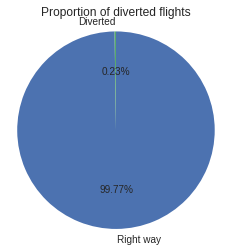

In [52]:
diverted_data = df_flights['Diverted'].value_counts()

#plot
plt.pie(diverted_data, labels = ['Right way', 'Diverted'], startangle=90, counterclock=False, autopct='%.2f%%')
plt.axis('square');


#label, title
plt.title('Proportion of diverted flights');

The percentage of deverted flights is very low, 0.23%

In [53]:
df_flights[df_flights['CarrierDelay']>0]['CarrierDelay'].describe()

count    814922.000000
mean         35.351155
std          53.478802
min           1.000000
25%          10.000000
50%          20.000000
75%          40.000000
max        2580.000000
Name: CarrierDelay, dtype: float64

75% < 40. So we just plot a limit number of time

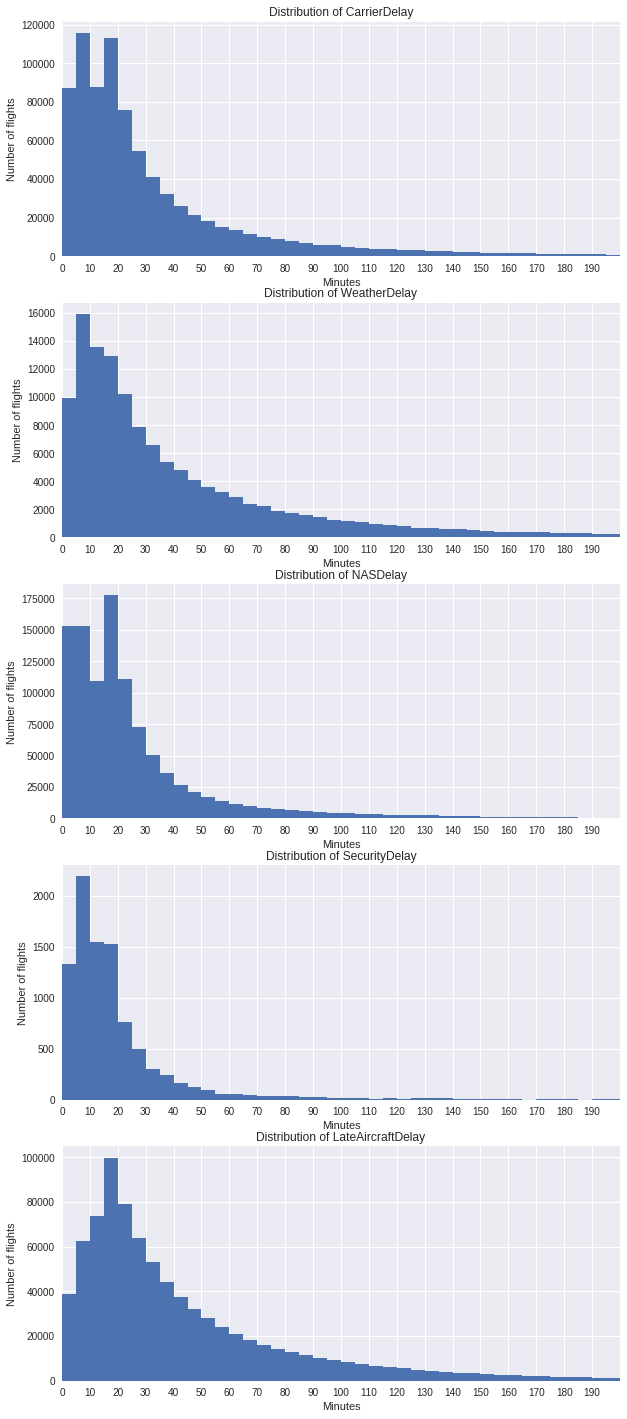

In [54]:
ticks = np.arange(0,200,10)
labels = ['{}'.format(v) for v in ticks]
def plot_delayed_distribution(varible, i):
    plt.subplot(5,1,i+1)
    df = df_flights[df_flights[varible]>0]
    bins = np.arange(0,df[varible].max()+5, 5)
    df[varible].hist(bins = bins)
    plt.xlim(0,200)
    plt.xticks(ticks, labels);
    #label, title
    plt.ylabel('Number of flights')
    plt.xlabel('Minutes')
    plt.title(f'Distribution of {varible}');
reason = ['CarrierDelay', 'WeatherDelay', 'NASDelay' , 'SecurityDelay', 'LateAircraftDelay']
plt.figure(figsize = [10,25])
for idx, varible in enumerate(reason):
    plot_delayed_distribution(varible, idx)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>In 2007 seem most of the cancelled flight is because of Carrier

>The percentage of deverted flights is very low, 0.23%

>Distance distribution is between 0 and 3000 miles

>2,16% of all the flight has been cancelled

>In 2007 seem most of the cancelled flight is because of Carrier, very few flights are cancelled due to security reasons

>Same with origin and destination, William B Hartsfield-Atlanta Intl is the airport have the most flights

>Sounthwest Airlines has the highest flights (15.7%) followed by American Airlines (8.5%).

>Saturday a little less flights than others.

>Because this part just univariate explore and almost is value count so I think no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> All the explored variables showed normal results

> ArrTime, CRSArrTime, CRSDepTime, DepTime were converted to datetime hh:mm format from float type.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

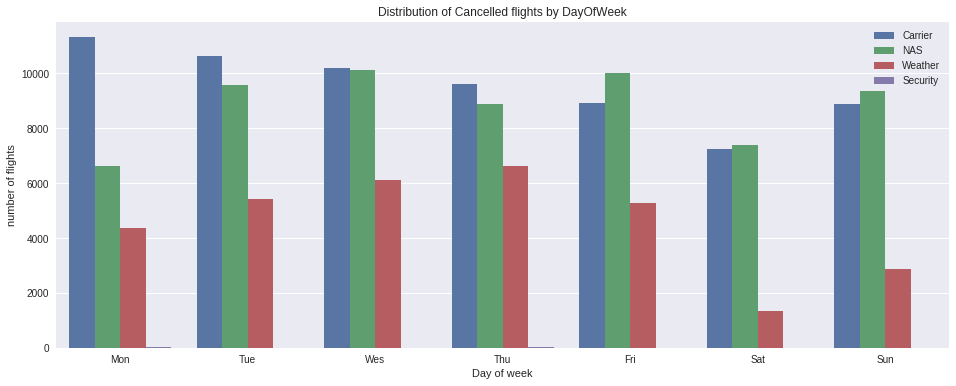

In [55]:
f, ax = plt.subplots(figsize=(16, 6))
sb.countplot(data=df_flights, x='DayOfWeek', hue='CancellationCode', ax=ax);
#get x location and label
locs, labels = plt.xticks()

ax.legend(['Carrier', 'NAS', 'Weather', 'Security'])

#Change x ticks label to mon, tue,,,
plt.xticks(locs, DayOfWeek_label)

# label, title
plt.xlabel('Day of week')
plt.ylabel('number of flights')
plt.title('Distribution of Cancelled flights by DayOfWeek');

Seem Cancelled cause by Carrier is highly likely happen in Monday

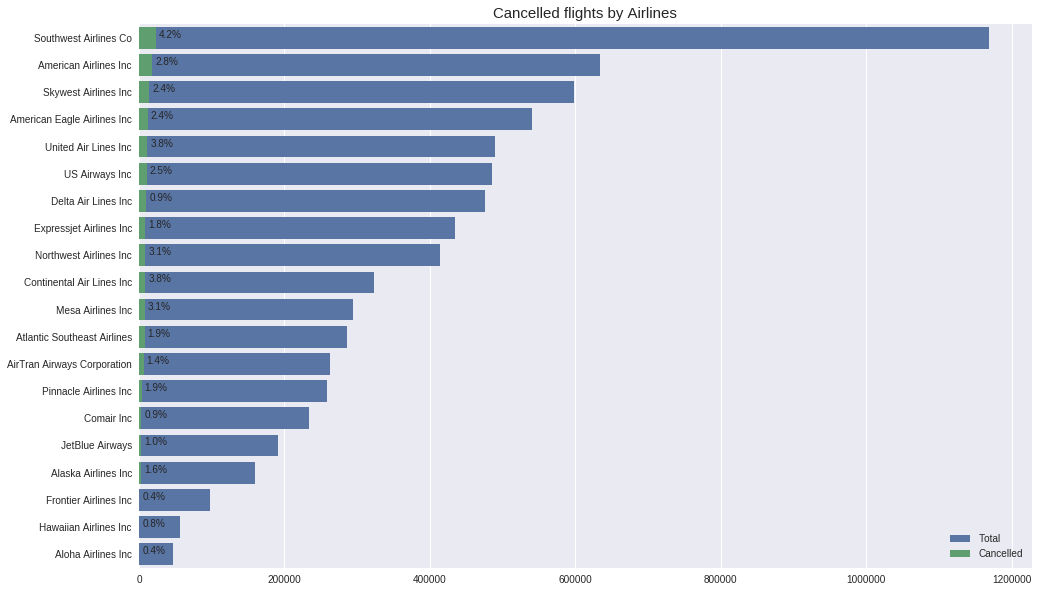

In [56]:
df_carrier_count = df_flights['UniqueCarrier'].value_counts()
df_cancelled_counts = df_flights[df_flights['Cancelled']==1]['UniqueCarrier'].value_counts()

# figure size
plt.figure(figsize=(16, 10))

#color
second_color = sb.color_palette()[1]

#plot
sb.barplot(y = df_carrier_count.index, x = df_carrier_count.values, order=df_carrier_count.index, label='Total', color=base_color)
sb.barplot(y = df_cancelled_counts.index, x = df_cancelled_counts.values, order=df_cancelled_counts.index, label='Cancelled', color=second_color)

#get location, tick labels
locs, labels = plt.yticks()

# add annotation
for loc, label in zip(locs, labels):
    count = df_carrier_count[label.get_text()]
    cancelled_count = df_cancelled_counts[label.get_text()]
    annotation_string = f'{100*cancelled_count/count:0.1f}%'
    plt.text( cancelled_count + 20000, loc, annotation_string, ha = 'center')

#legend, xticks
plt.legend()
plt.xticks(rotation=0)

# change y tick label
plt.yticks(locs, label_carrier);
plt.title('Cancelled flights by Airlines', fontsize=15);

Southwest Airlines Co is the carrier have most flight but also have the percentage of cancelled highest. After is United Air Lines Inc.
From top 10, Delta Air Lines Inc is the carrier with lowest percentage of cancelled flight

In [57]:
df_flights['Distance'].isna().sum()

0

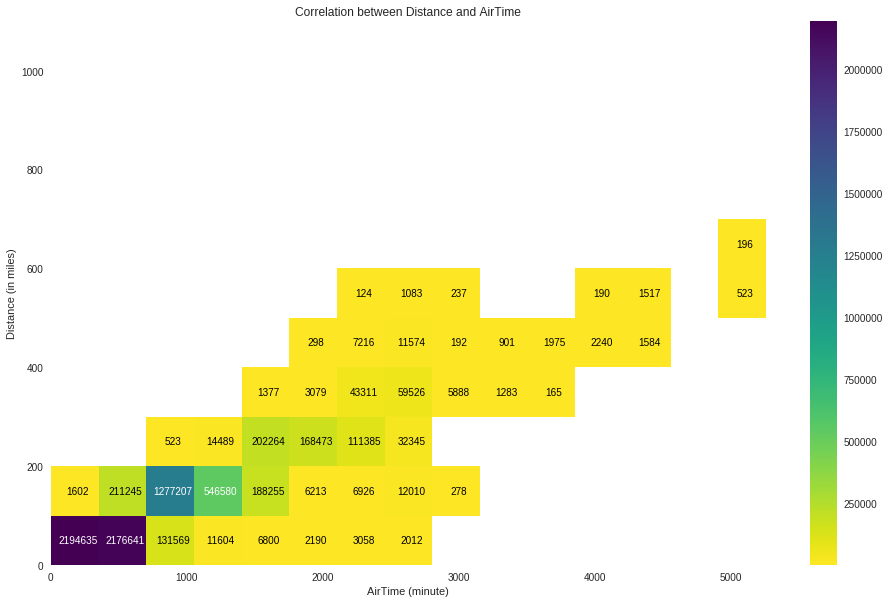

In [58]:
# figure size
plt.figure(figsize=(16, 10))
ax = plt.gca()
ax.grid(False)
ax.set_facecolor('white')
bins_x = np.arange(0, 5500, 350)
bins_y = np.arange(0,  1200, 100)
h2d = plt.hist2d(data = df_flights, x = 'Distance', y = 'AirTime', cmin=100 , cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()

plt.xlabel('AirTime (minute)')
plt.ylabel('Distance (in miles)')
plt.title('Correlation between Distance and AirTime')

counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 500000: # increase visibility on darker cells
            plt.text(bins_x[i]+200, bins_y[j] +50, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c < 500000 :
            plt.text(bins_x[i]+200, bins_y[j] +50, int(c),
                     ha = 'center', va = 'center', color = 'black')

Rositive relation as I expected.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Southwest Airlines Co is the carrier have most flight but also have the percentage of cancelled highest. After is United Air Lines Inc. From top 10, Delta Air Lines Inc is the carrier with lowest percentage of cancelled flight.

> Seem Cancelled cause by Carrier is highly likely happen in Monday

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Relation between air time and distance Almost linear as I expect.I think there some other reason for the wide of this relation. Maybe because of the age of the plane or the plane have to not go straight.

## Multivariate Exploration

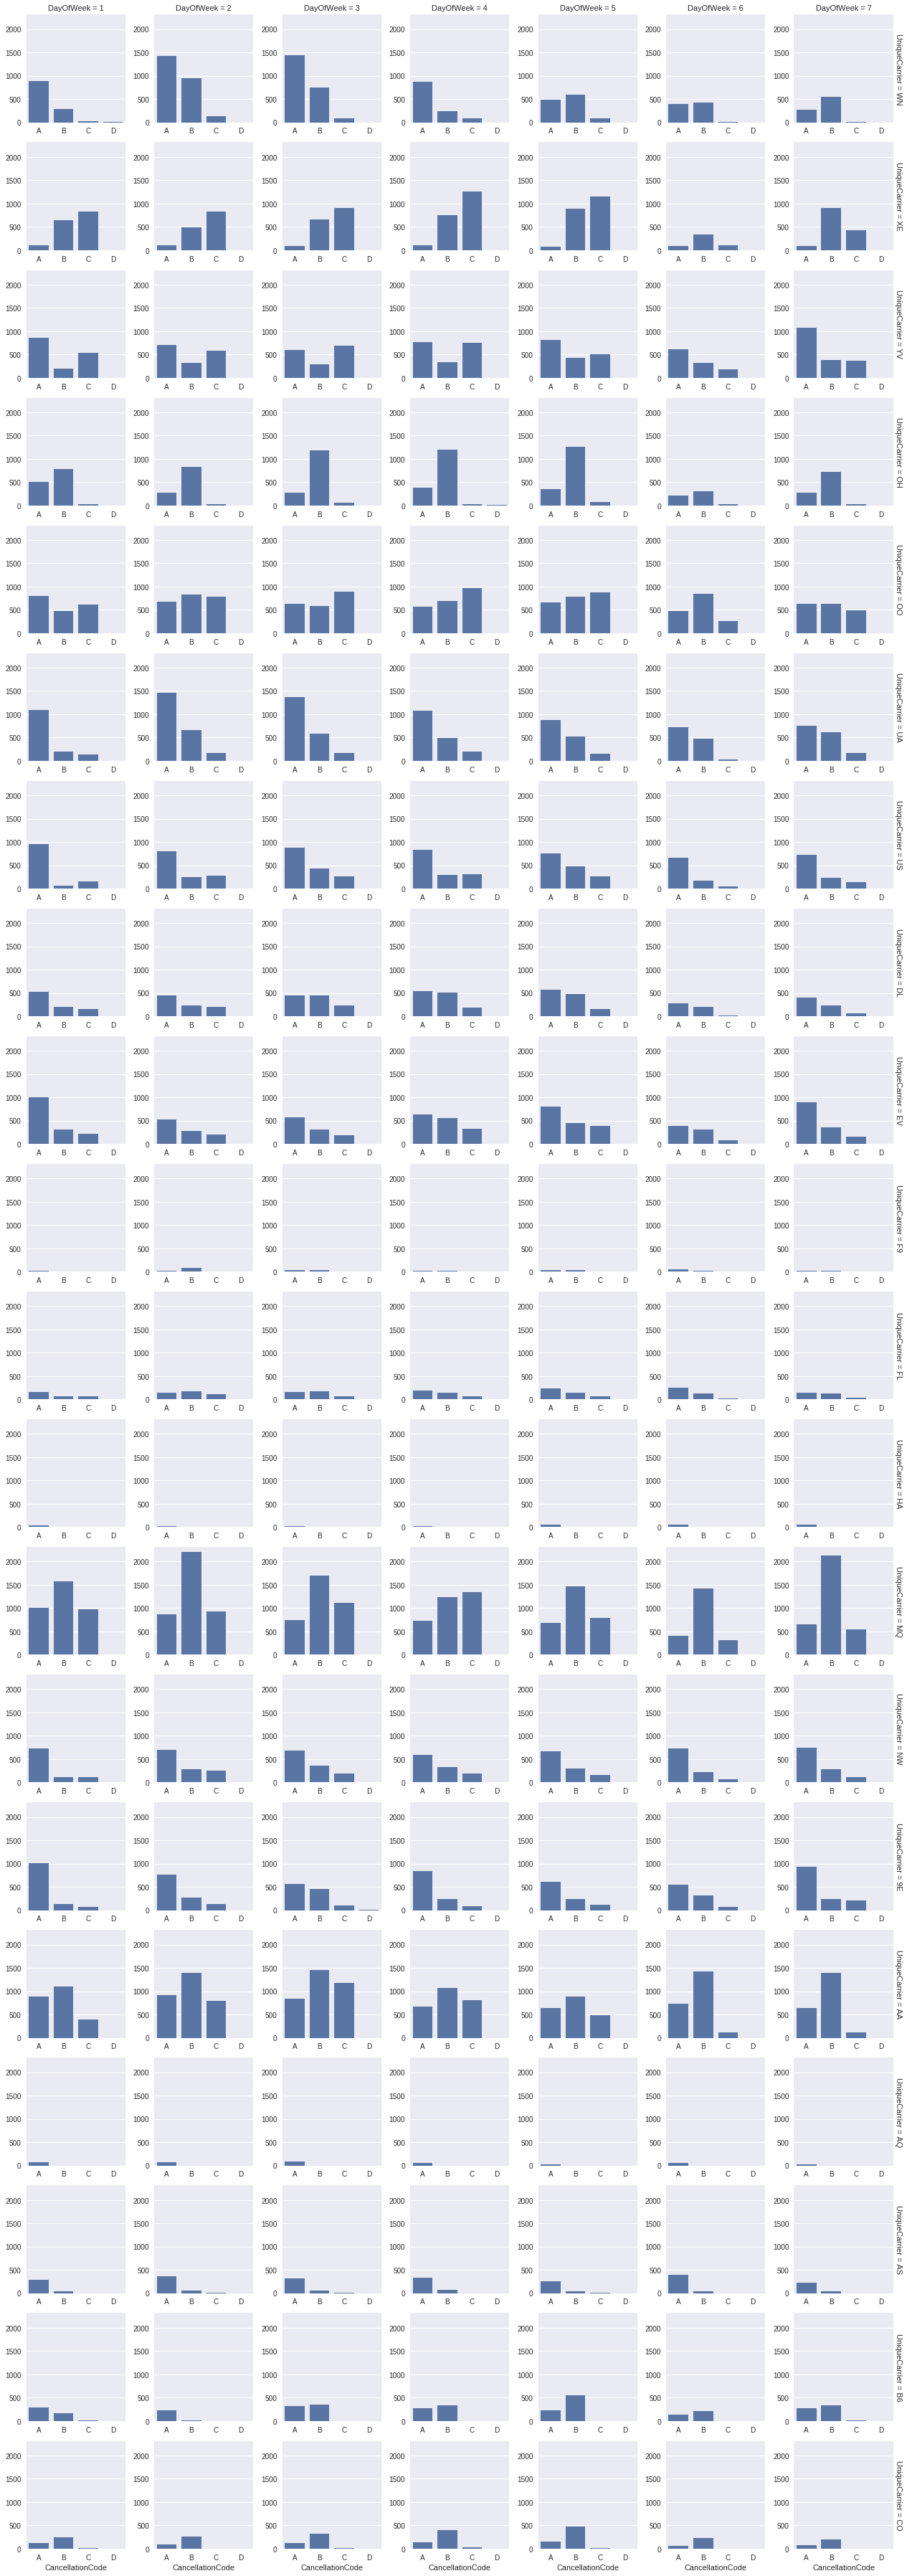

In [59]:
g = sb.FacetGrid(data = df_flights, col = 'DayOfWeek', row = 'UniqueCarrier', size = 2.5,
                margin_titles = True)
g.map(sb.countplot, 'CancellationCode', order=['A', 'B', 'C', 'D'])

There is no clarity on the day of the week affect the causes of flight cancellations

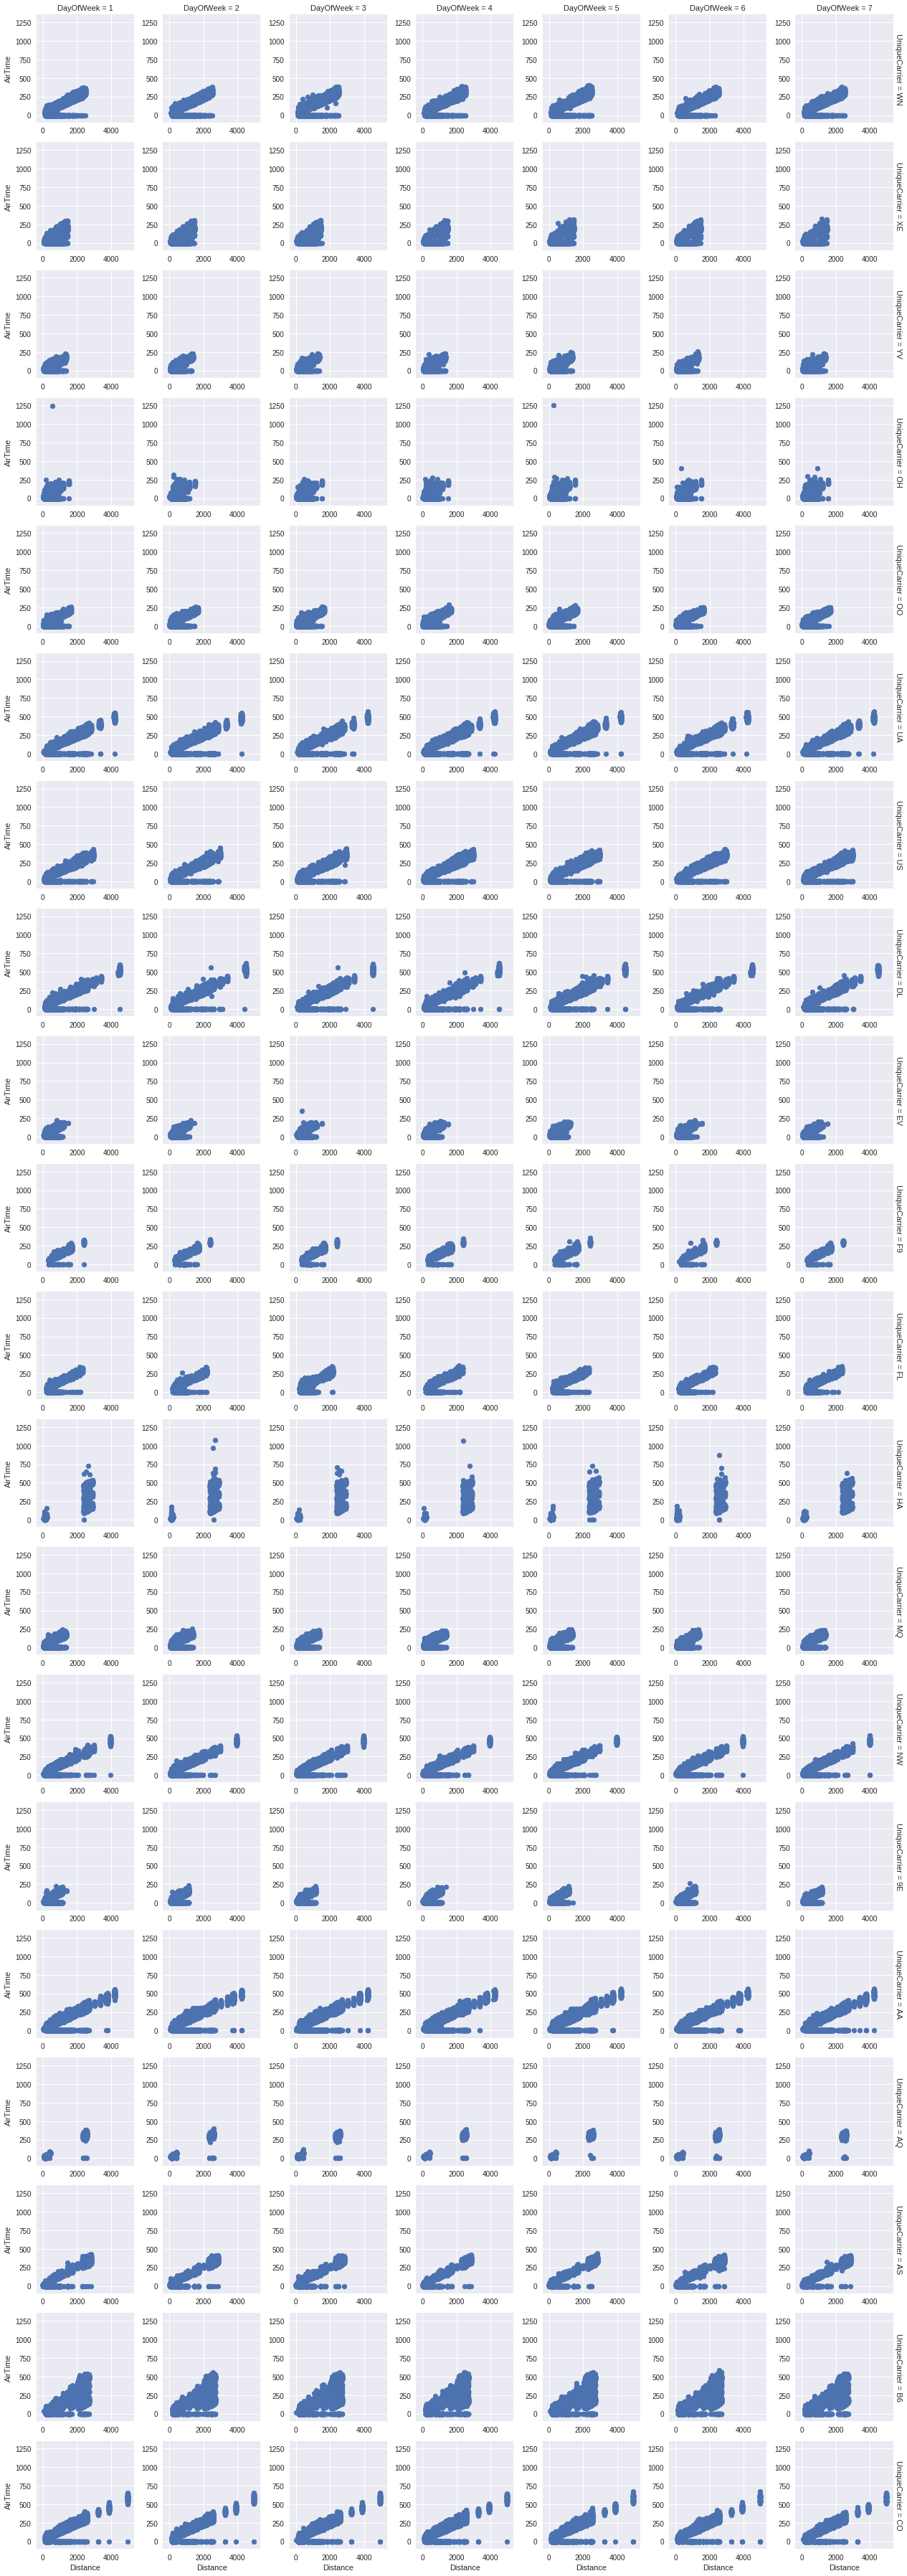

In [60]:
g = sb.FacetGrid(data = df_flights, col = 'DayOfWeek', row = 'UniqueCarrier', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'Distance', 'AirTime')

Just a few carrier have the long distance flight like 4000 miles. 9E, MQ, EV, OO, OH, YV, XE just have flights less than 200km over the week.
Seem no different between carrier, day of week in distance and air time.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is no clarity on the day of the week affect the causes of flight cancellations.

### Were there any interesting or surprising interactions between features?

> Just a few carrier have the long distance flight like 4000 miles. 9E, MQ, EV, OO, OH, YV, XE just have flights less than 200km over the week. Seem no different between carrier, day of week in distance and air time.

## Conclusions

> Find out top 10 busiest airport 2007

> The carrier have highest percentage of cancelled is Southwest Airlines and the carrier have lowest percentage of cancelled is Delta Air Lines

> Sounthwest Airlines has the highest flights (15.7%) followed by American Airlines (8.5%).

> The biggest reason for the flights to be cancelled is the Carrier causes, followed by Weather causes.


> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

